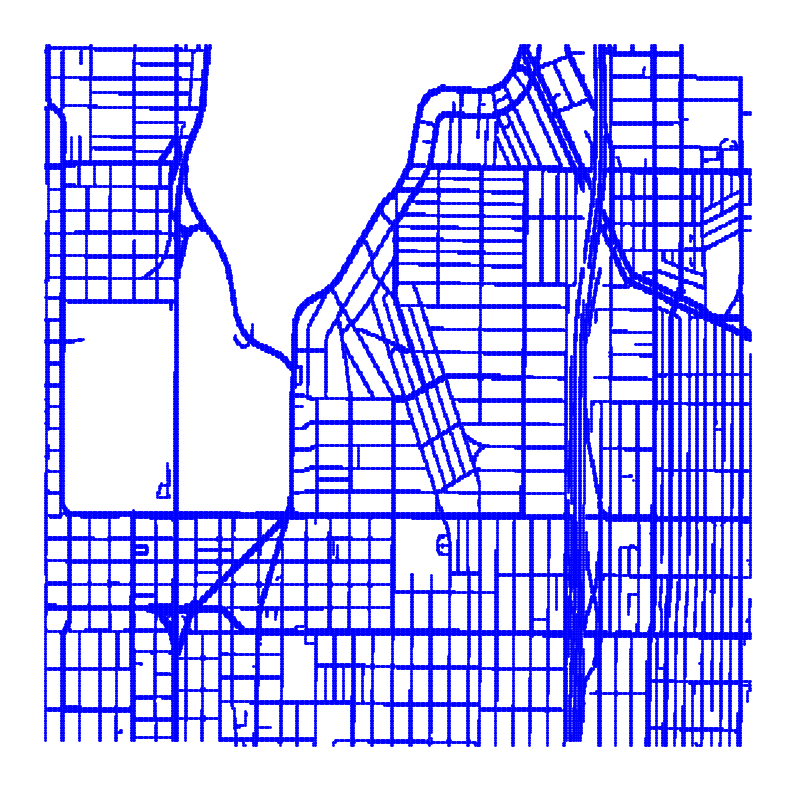

In [62]:
# write a jupyter notebook to do image processing on a google maps roadmap snapshot to detect the road network and give nodes and edges that make up the complete road network
#
# Steps to do the image processing task must look something like:
# 1. load the thresholded binary image google maps roadmap snapshot from file system in which the road network is represented by white pixels and the background is represented by black pixels
import cv2
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Load the binary image
img = cv2.imread("road_dil_grey.png", 0)
# plt.imshow(img, cmap="gray")
# plt.show()

# Create a list to store the graph nodes
graph_nodes = []

# Loop through each row and column of the image and place a node at each white pixel
for i in range(0, img.shape[0], 2):
    for j in range(0, img.shape[1], 2):
        if img[i][j] == 255:
            graph_nodes.append((j, img.shape[0] - i - 1))

# Create a graph from the list of nodes
G = nx.Graph()
G.add_nodes_from(range(len(graph_nodes)))

# Plot the graph nodes and edges
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, graph_nodes, node_size=1, node_color="blue")
plt.axis("off")

plt.show()




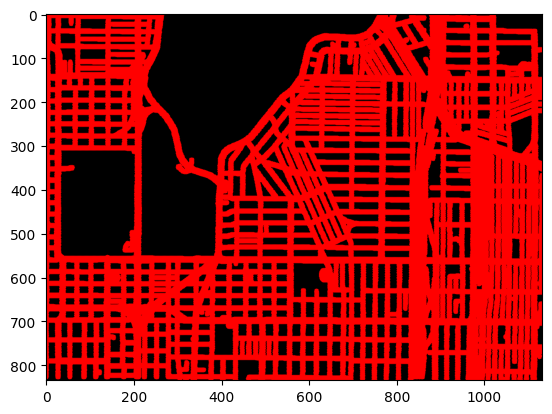

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load binary image
img = cv2.imread("road_dil_grey.png", cv2.IMREAD_GRAYSCALE)

# Get the white pixel coordinates with a spacing of 2 pixels
points = np.column_stack(np.where(img == 255))[::2]

# Plot the blue dots on the original image
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for point in points:
    img = cv2.circle(img, (point[1], point[0]), 5, (255, 0, 0), -1)

# Show the result
plt.imshow(img)
plt.show()
